In [59]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [76]:
df = pd.read_csv("villageconnect_large.csv")

In [77]:
print("Dataset Shape:",df.shape)

Dataset Shape: (1000, 6)


In [78]:
df.head()

,Region,Service,Availability_%,Satisfaction_Score,Cost,Usage_Hours
0,East,Electricity,96,2.97,988,1.56
1,West,Internet,61,3.00,931,5.41
2,North,Water,65,4.01,256,7.97
3,East,Water,73,4.98,767,9.45
4,East,Water,68,3.99,750,7.59


In [79]:
print("Missing Values:\n", df.isnull().sum())
df.fillna(method='ffill', inplace=True) 

Missing Values:
 Region                0
Service               0
Availability_%        0
Satisfaction_Score    0
Cost                  0
Usage_Hours           0
dtype: int64


C:\Users\satya\AppData\Local\Temp\ipykernel_54528\1520307329.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [80]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              1000 non-null   object 
 1   Service             1000 non-null   object 
 2   Availability_%      1000 non-null   int64  
 3   Satisfaction_Score  1000 non-null   float64
 4   Cost                1000 non-null   int64  
 5   Usage_Hours         1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB
None
       Availability_%  Satisfaction_Score         Cost  Usage_Hours
count     1000.000000         1000.000000  1000.000000   1000.00000
mean        75.122000            3.499600   554.682000      5.28805
std         14.692208            0.865832   260.231211      2.72556
min         50.000000            2.000000   100.000000      0.51000
25%         62.000000            2.780000   321.500000      2.91750
50%         75.000000      

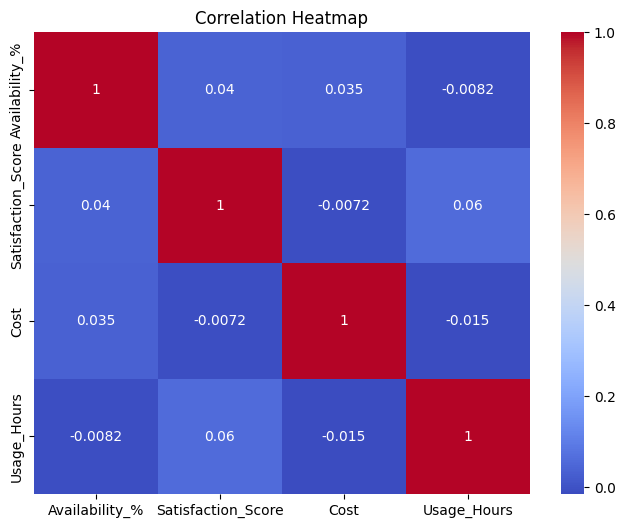

In [81]:
 #Correlation Heatmap

numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


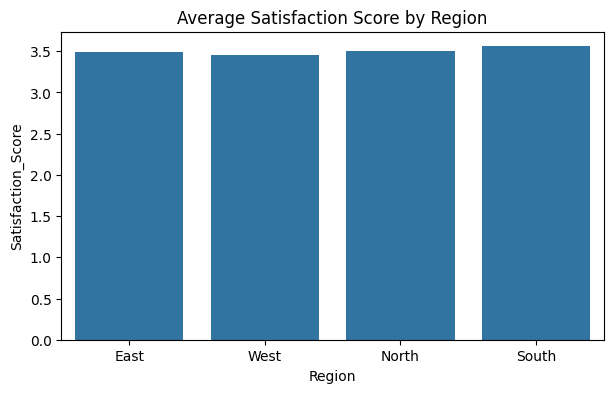

In [82]:
# Region-wise Satisfaction Score
plt.figure(figsize=(7,4))
sns.barplot(data=df, x="Region", y="Satisfaction_Score", errorbar=None)
plt.title("Average Satisfaction Score by Region")
plt.show()

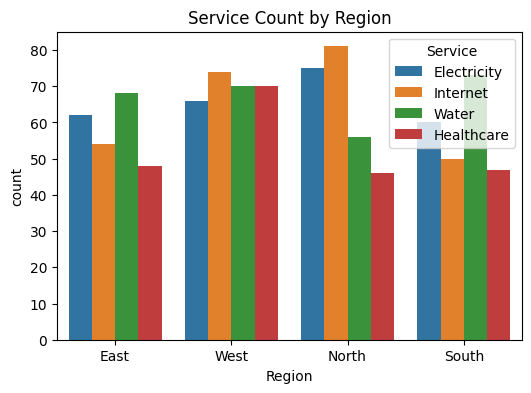

In [83]:
# Service Count by Region
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Region", hue="Service")
plt.title("Service Count by Region")
plt.show()

In [84]:
X = df.drop(["Satisfaction_Score"], axis=1)

In [85]:
#convert Categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)
y = df["Satisfaction_Score"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}
results = {}

In [88]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"\n{name} Results:")
    print("MSE:", round(mse, 2))
    print("R² Score:", round(r2, 2))


Linear Regression Results:
MSE: 0.75
R² Score: -0.02

Decision Tree Results:
MSE: 1.58
R² Score: -1.14

Random Forest Results:
MSE: 0.85
R² Score: -0.16


In [89]:
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
best_model = models[best_model_name]

In [91]:
print(f"\n Best Model: {best_model_name} with R² Score {results[best_model_name]['R2 Score']}")


 Best Model: Linear Regression with R² Score -0.015211770615205955


In [92]:
joblib.dump(best_model, "villageconnect_best_model.pkl")
print("\nModel saved as villageconnect_best_model.pkl")



Model saved as villageconnect_best_model.pkl
